

> # Neural Network Example

Xây dựng neural network với hai tầng ẩn (hidden layer). Các trọng số và mối liên hệ giữa các tầng ẩn được thiết lập và cài đặt bằng việc sử dụng API của thư viện PyTorch




# Neural Network Example

Xây dựng neural network với hai tầng ẩn (hidden layer). Các trọng số và mối liên hệ giữa các tầng ẩn được thiết lập và cài đặt bằng việc sử dụng API của thư viện PyTorch


In [18]:
from __future__ import absolute_import, division, print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np

In [20]:
# Chuẩn bị dữ liệu
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Chuyển đổi sang định dạng float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Chuẩn hóa ảnh từ from [0, 255] to [0, 1].
x_train, x_test = x_train / 255, x_test / 255
x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)

In [21]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
# n_hidden_2 = 256 # 2nd layer number of neurons.

In [22]:
batch_size = 16

In [26]:
trainloader = []
for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)

testloader = []
for (i,j) in zip(x_test, y_test):
    testloader.append([i,j])
testloader = torch.utils.data.DataLoader(testloader, shuffle=True, batch_size=batch_size)

## Hiển thị một vài ví dụ

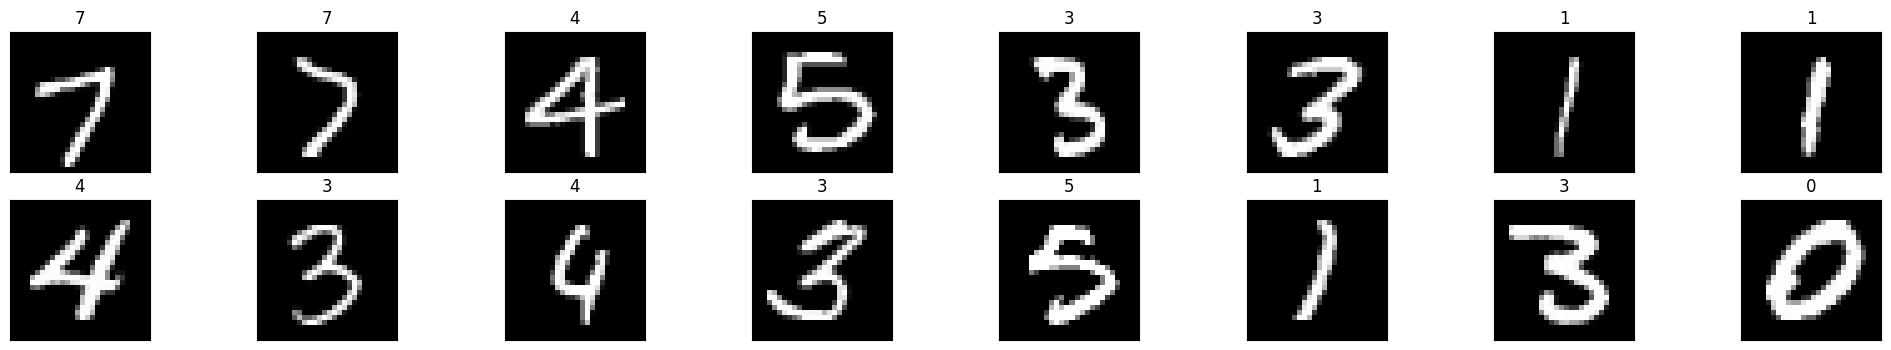

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()

# hiển thị dữ liệu theo từng batch và nhãn tương ứng
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [50]:
import torch.nn as nn
import torch.nn.functional as F

## định nghĩa mạng
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, num_classes)
    def forward(self, x):
        # chuyển từ định dạng ma trận thành vector
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# initialize the NN
model = MLPModel()
print(model)

MLPModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [51]:
import torch.optim as optim
# trong hàm loss cross entropy đã áp dụng hàm soft max cho vector đầu ra
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [58]:
def accuracy():
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(inputs)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total

In [59]:
losses = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

Iteration: 10, accuracy: 0.101
Iteration: 20, accuracy: 0.097
Iteration: 30, accuracy: 0.100
Iteration: 40, accuracy: 0.097
Iteration: 50, accuracy: 0.101
Iteration: 60, accuracy: 0.100
Iteration: 70, accuracy: 0.102
Iteration: 80, accuracy: 0.106
Iteration: 90, accuracy: 0.103
Iteration: 100, accuracy: 0.102
Finished Training


In [4]:
plt.plot([i for i in range(len(losses))], losses, label='Loss line')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

## Bài tập

*   Tiến hành huấn luyện mô hình với số lượng epoch lần lượt là 50, 100, 150.Rút ra nhận xét.

In [60]:
losses = []
for epoch in range(150):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels) #-> hàm mất mát
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 5 == 4:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

Iteration: 5, accuracy: 0.100
Iteration: 10, accuracy: 0.098
Iteration: 15, accuracy: 0.104
Iteration: 20, accuracy: 0.103
Iteration: 25, accuracy: 0.103
Iteration: 30, accuracy: 0.103
Iteration: 35, accuracy: 0.099
Iteration: 40, accuracy: 0.100
Iteration: 45, accuracy: 0.102
Iteration: 50, accuracy: 0.104
Iteration: 55, accuracy: 0.101
Iteration: 60, accuracy: 0.102
Iteration: 65, accuracy: 0.101
Iteration: 70, accuracy: 0.100
Iteration: 75, accuracy: 0.097
Iteration: 80, accuracy: 0.102
Iteration: 85, accuracy: 0.098
Iteration: 90, accuracy: 0.102
Iteration: 95, accuracy: 0.099
Iteration: 100, accuracy: 0.100
Iteration: 105, accuracy: 0.100
Iteration: 110, accuracy: 0.100
Iteration: 115, accuracy: 0.102
Iteration: 120, accuracy: 0.094
Iteration: 125, accuracy: 0.103
Iteration: 130, accuracy: 0.096
Iteration: 135, accuracy: 0.105
Iteration: 140, accuracy: 0.102
Iteration: 145, accuracy: 0.098
Iteration: 150, accuracy: 0.099




*   Hiển thị một số kết quả



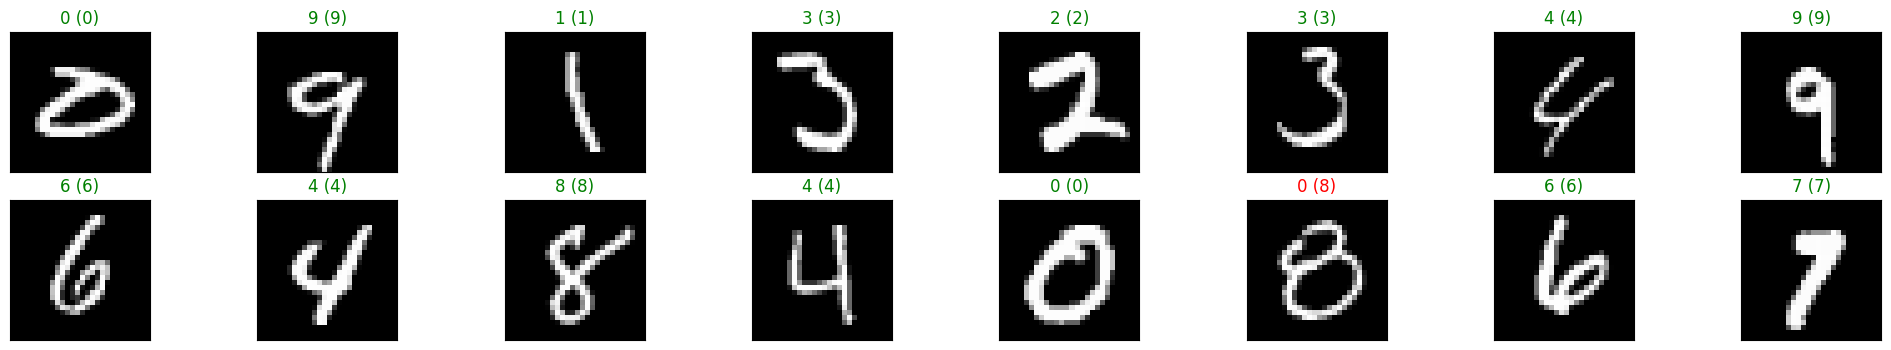

In [57]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [2]:
n_hidden_3 = 100
class MLPModel2(MLPModel):
    def __init__(self):
        super(MLPModel2, self).__init__()
        self.fc3 = nn.Linear(n_hidden_2, n_hidden_3)
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x
model = MLPModel2()
# print(model)

from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.15)
validloader = []
for (i,j) in zip(x_val, y_val):
    validloader.append([i,j])
validloader = torch.utils.data.DataLoader(validloader, shuffle=True, batch_size=batch_size)

trainloader = []
for (i,j) in zip(x_train2, y_train2):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)

testloader = []
for (i,j) in zip(x_test, y_test):
    testloader.append([i,j])
testloader = torch.utils.data.DataLoader(testloader, shuffle=True, batch_size = batch_size)


def accuracy2():
    correct = 0
    total = 0
    # model.eval()
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total
criterion = nn.CrossEntropyLoss()
lr = [0.1, 0.05, 0.001]
for i in lr:
    print(f"At learning rate {i}:")
    optimizer = optim.SGD(model.parameters(), lr = i)
    losses = []
    for epoch in range(50):  # loop over the dataset multiple times
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels) #-> hàm mất mát
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
        losses.append(running_loss)
        model.eval()
        accuracy2()
        if epoch % 5 == 4:
            print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy2()))

NameError: name 'MLPModel' is not defined